In [63]:
# save cinema locations in Prague

import urllib2
import json
import api_key
import pandas as pd
import colorsys
import time

requestURL = 'https://maps.googleapis.com/maps/api/place/textsearch/json?query=cinemas%20in%20Prague&key=' + api_key.API_KEY

def parse_next(json_data, names, lats, lngs, ratings):
    parsed = 0
    for result in json_data['results']:
        if (('name' in result) and ('geometry' in result) and ('location' in result['geometry']) and ('rating' in result)
            and ('lat' in result['geometry']['location']) and ('lng' in result['geometry']['location'])):
            names.append(result['name'])
            ratings.append(result['rating'])
            lats.append(result['geometry']['location']['lat'])
            lngs.append(result['geometry']['location']['lng'])
            parsed += 1
    return parsed

names = []
lats = []
lngs = []
ratings = []
parsed = 0
to_parse = 200
next_page_token = None

places = pd.DataFrame()

while parsed < to_parse:
    new_address = requestURL
    if next_page_token is not None:
        new_address = requestURL + '&pagetoken=' + str(next_page_token)

    #print(new_address)
    html = urllib2.urlopen(new_address).read().decode('utf-8')
    data = json.loads(html)
    parsed += parse_next(data, names, lats, lngs, ratings)

    if 'next_page_token' not in data:
        break
    
    next_page_token = data['next_page_token']
    time.sleep(5)
    
places['name'] = names
places['lat'] = lats
places['lng'] = lngs
places['rating'] = ratings
places.to_csv("cinema_places.csv", encoding='utf-8')

In [49]:
# parse distances by car

import urllib2
import json
import api_key
import pandas as pd
import colorsys
import time

requestURL = 'https://maps.googleapis.com/maps/api/distancematrix/json?'
key = api_key.API_KEY

my_location = 'Pelc+Tyrolka'
dest_location = ''

def parse_next(json_data, name, lat, lng, distances_names, distances_time, distances_km, distances_lats, distances_lngs):
    if 'rows' not in data:
        return

    element = data['rows']
    if len(element) == 0:
        return

    element = element[0]
    if 'elements' not in element:
        return

    element = element['elements']
    if len(element) == 0:
        return

    element = element[0]
    if 'distance' in element:
        distances_names.append(name)
        distances_time.append(element['duration']['value'])
        distances_km.append(element['distance']['value'])
        distances_lats.append(lat)
        distances_lngs.append(lng)

        
distances_names = []
distances_time = []
distances_km = []
distances_lats = []
distances_lngs = []

places = pd.DataFrame()

i = 0
for lat,lng in zip(lats, lngs):
    address = str(lat) + ',' + str(lng)
    new_address = requestURL + 'origins=' + my_location + '&destinations=' + address.replace(' ', '+') + '&key=' + key

    # print(new_address)
    html = urllib2.urlopen(new_address).read().decode('utf-8')
    data = json.loads(html)
    parse_next(data, names[i], lats[i], lngs[i], distances_names, distances_time, distances_km, distances_lats, distances_lngs)
    
    i += 1
    time.sleep(2)
    
places['name'] = distances_names
places['distances_time'] = distances_time
places['distances_km'] = distances_km
places['lats'] = distances_lats
places['lngs'] = distances_lngs
places.to_csv("cinema_distances_car.csv", encoding='utf-8')

In [52]:
# parse distances by transit (bus, train)

import urllib2
import json
import api_key
import pandas as pd
import colorsys
import time

requestURL = 'https://maps.googleapis.com/maps/api/distancematrix/json?mode=transit&'
key = api_key.API_KEY

my_location = 'Pelc+Tyrolka'
dest_location = ''

def parse_next(json_data, name, lat, lng, distances_names, distances_time, distances_km, distances_lats, distances_lngs):
    if 'rows' not in data:
        return

    element = data['rows']
    if len(element) == 0:
        return

    element = element[0]
    if 'elements' not in element:
        return

    element = element['elements']
    if len(element) == 0:
        return

    element = element[0]
    if 'distance' in element:
        distances_names.append(name)
        distances_time.append(element['duration']['value'])
        distances_km.append(element['distance']['value'])
        distances_lats.append(lat)
        distances_lngs.append(lng)
        
distances_names = []
distances_time = []
distances_km = []
distances_lats = []
distances_lngs = []

places_transit = pd.DataFrame()

i = 0
for lat,lng in zip(lats, lngs):
    address = str(lat) + ',' + str(lng)
    new_address = requestURL + 'origins=' + my_location + '&destinations=' + address.replace(' ', '+') + '&key=' + key

    # print(new_address)
    html = urllib2.urlopen(new_address).read().decode('utf-8')
    data = json.loads(html)
    parse_next(data, names[i], lats[i], lngs[i], distances_names, distances_time, distances_km, distances_lats, distances_lngs)
    
    i += 1
    time.sleep(2)
    
places_transit['name'] = distances_names
places_transit['distances_time'] = distances_time
places_transit['distances_km'] = distances_km
places_transit['lats'] = distances_lats
places_transit['lngs'] = distances_lngs
places_transit.to_csv("cinema_distances_transit.csv", encoding='utf-8')

In [3]:
import pandas as pd
places = pd.DataFrame.from_csv("cinema_places.csv")
places

,name,lat,lng,rating
0,Cinema City,50.086384,14.427403,4.4
1,Kino Aero,50.090172,14.471915,4.7
2,BIO OKO,50.099996,14.430005,4.6
3,Kino Světozor,50.081833,14.425259,4.6
4,Cinema City,50.078849,14.461108,4.4
5,Premiere Cinemas Praha Hostivař,50.053432,14.517467,4.3
6,Kino Lucerna,50.081370,14.425403,4.2
7,Kino Atlas,50.091462,14.438476,4.3
8,Komorní kino Evald,50.082452,14.420060,4.5
9,Cinema City,50.073930,14.402674,4.3


In [4]:
places_car = pd.DataFrame.from_csv("cinema_distances_car.csv")
places_car

,name,distances_time,distances_km,lats,lngs
0,Cinema City,815,6129,50.086384,14.427403
1,Kino Aero,778,8120,50.090172,14.471915
2,BIO OKO,445,2891,50.099996,14.430005
3,Kino Světozor,689,5656,50.081833,14.425259
4,Cinema City,853,6563,50.078849,14.461108
5,Premiere Cinemas Praha Hostivař,1369,23252,50.053432,14.517467
6,Kino Lucerna,755,6280,50.081370,14.425403
7,Kino Atlas,641,4488,50.091462,14.438476
8,Komorní kino Evald,843,7022,50.082452,14.420060
9,Cinema City,900,10960,50.073930,14.402674


In [5]:
places_transit = pd.DataFrame.from_csv("cinema_distances_transit.csv")
places_transit

,name,distances_time,distances_km,lats,lngs
0,Cinema City,1738,4936,50.086384,14.427403
1,Kino Aero,2532,8517,50.090172,14.471915
2,BIO OKO,1135,3200,50.099996,14.430005
3,Kino Světozor,1932,5883,50.081833,14.425259
4,Cinema City,2126,7285,50.078849,14.461108
5,Premiere Cinemas Praha Hostivař,3786,14375,50.053432,14.517467
6,Kino Lucerna,1983,5930,50.081370,14.425403
7,Kino Atlas,1449,3810,50.091462,14.438476
8,Komorní kino Evald,1913,6288,50.082452,14.420060
9,Cinema City,2373,7474,50.073930,14.402674


In [6]:
print "Max lat:", max(places['lat'])
print "Min lat:", min(places['lat'])
print "Max lng:", max(places['lng'])
print "Min lng:", min(places['lng'])

Max lat: 50.1371125
Min lat: 50.0321765
Max lng: 14.5278204
Min lng: 14.2871948


In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimg
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import colorsys

MIN_LNG = min(places['lng']) - 0.01
MAX_LNG = max(places['lng']) + 0.01
MIN_LAT = min(places['lat']) - 0.01
MAX_LAT = max(places['lat']) + 0.01

ZOOM_LEVEL = 12
POINT_ALPHA = 1.0
GAUSS_ALPHA = 0.4
SIZE = 70

def make_map(figsize=(16, 12), projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

def show_map(data, colors='green', size=SIZE):
    
    extent = [MIN_LNG, MAX_LNG, MIN_LAT, MAX_LAT]
    
    request = cimg.OSM()
    fig, ax = make_map(figsize=(16,12), projection=request.crs)
    ax.set_extent(extent)

    ax.add_image(request, ZOOM_LEVEL)
    ax.scatter(data['lng'], data['lat'], transform=ccrs.PlateCarree(), alpha=POINT_ALPHA, s=size, c=colors)
    plt.show()


In [56]:
def rescale(array):
    rescaled = [float((x - min(array))) / float((max(array) - min(array))) for x in array]
    return rescaled

In [60]:
import math

def get_colors(times):
    colors = [0] * len(times)
    rescaled = rescale(times)
    for i in range(len(times)):
        colors[i] = colorsys.hsv_to_rgb((1 - rescaled[i]) / 3.6, 1, 1)
    return colors

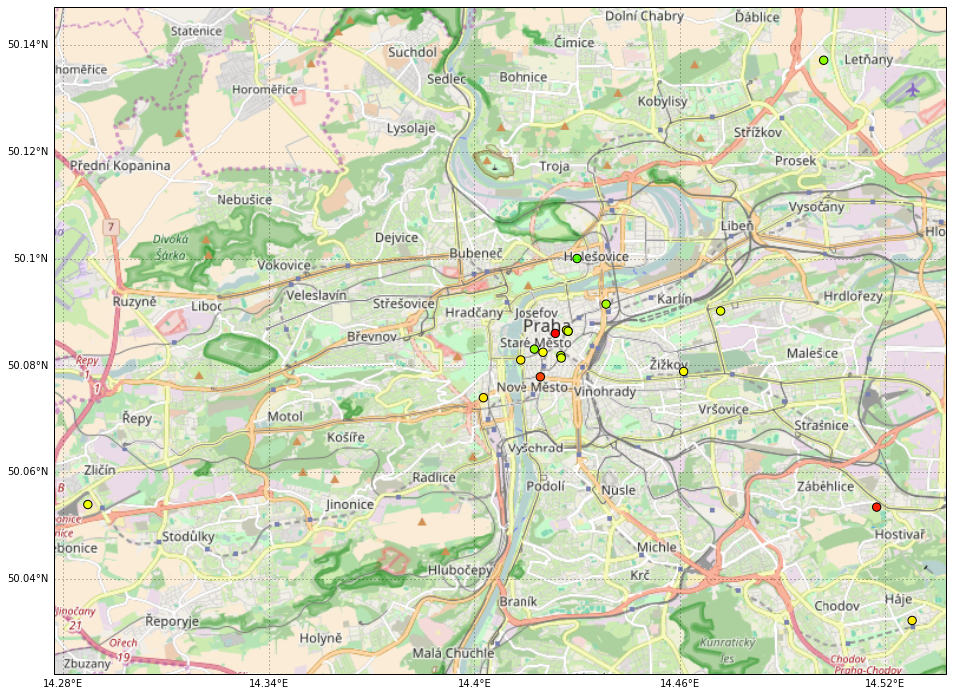

In [61]:
cols = get_colors(places_car['distances_time'])
show_map(places, colors=cols)

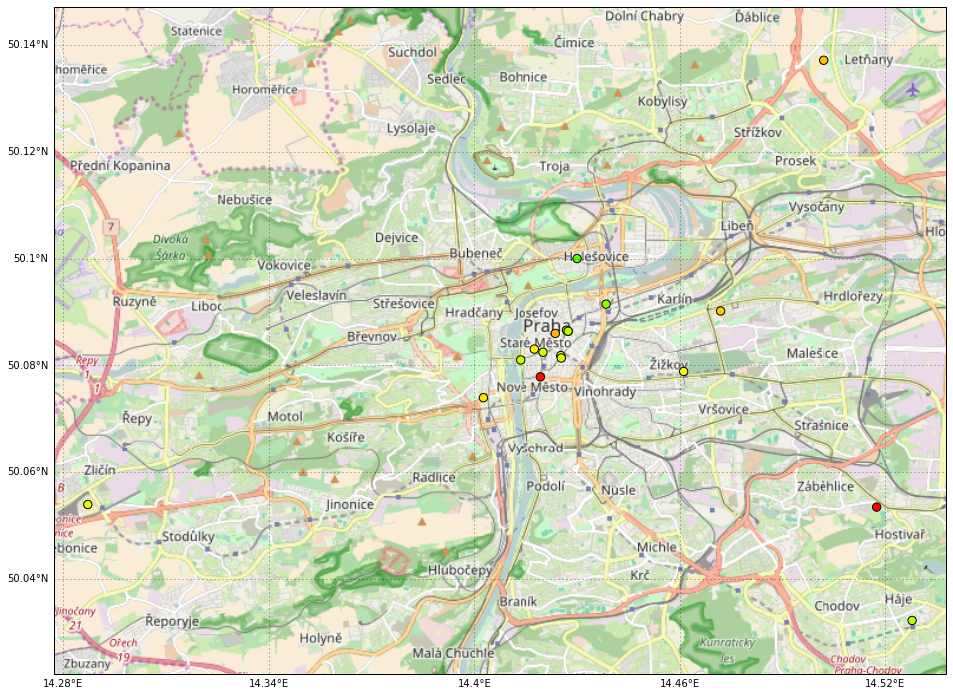

In [62]:
cols = get_colors(places_transit['distances_time'])
show_map(places, colors=cols)